In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [4]:
car = pd.read_csv('Sport car price.csv')
print(car)

         Car Make Car Model  Year Engine Size (L) Horsepower Torque (lb-ft)  \
0         Porsche       911  2022               3        379            331   
1     Lamborghini   Huracan  2021             5.2        630            443   
2         Ferrari   488 GTB  2022             3.9        661            561   
3            Audi        R8  2022             5.2        562            406   
4         McLaren      720S  2021               4        710            568   
...           ...       ...   ...             ...        ...            ...   
1002   Koenigsegg     Jesko  2022               5       1280           1106   
1003        Lotus     Evija  2021  Electric Motor       1972           1254   
1004      McLaren     Senna  2021               4        789            590   
1005       Pagani    Huayra  2021               6        764            738   
1006        Rimac    Nevera  2021  Electric Motor       1888           1696   

     0-60 MPH Time (seconds) Price (in USD)  
0    

In [5]:
car.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [7]:
car.describe()

,Year
count,1007.000000
mean,2021.201589
std,2.019802
min,1965.000000
25%,2021.000000
50%,2021.000000
75%,2022.000000
max,2023.000000


In [8]:
car['Price (in USD)'] = car['Price (in USD)'].apply(lambda x : x.replace(',', ''))
car.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4,710,568,2.7,298000


In [9]:
car.isna().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

In [10]:
car[car["Engine Size (L)"].isna()]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
168,Rimac,C_Two,2022,NaN,1914,1696,1.9,2400000
171,Tesla,Model S Plaid,2021,NaN,1020,1050,1.98,131190
222,Porsche,Taycan Turbo S,2021,NaN,750,774,2.6,185000
247,Tesla,Model S Plaid,2022,NaN,1020,1050,1.9,131190
387,Rimac,C_Two,2022,NaN,1888,1696,1.8,2400000
389,Tesla,Roadster,2022,NaN,10000+,0,1.9,200000
686,Rimac,C_Two,2022,NaN,1914,1696,1.85,2400000
697,Lotus,Evija,2022,NaN,1972,1254,2.5,2700000
752,Porsche,Taycan,2022,NaN,469,479,3.8,79900
916,Tesla,Roadster,2022,NaN,"10,000+",NaN,1.9,200000


In [11]:
car["Engine Size (L)"] = np.where((car["Car Make"] == "Rimac") | (car["Car Make"] == "Tesla"), "Electric","Gas") 

In [12]:
car["Engine Size (L)"].value_counts()

Engine Size (L)
Gas         974
Electric     33
Name: count, dtype: int64

In [13]:
car.isna().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             3
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

In [14]:
car['Torque (lb-ft)'] = pd.to_numeric(car['Torque (lb-ft)'], errors='coerce')

In [15]:
car['Torque (lb-ft)'] = car['Torque (lb-ft)'].fillna(car['Torque (lb-ft)'].mean())

In [16]:
print(car['Torque (lb-ft)'].isna().sum())


0


In [17]:
car.isna().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

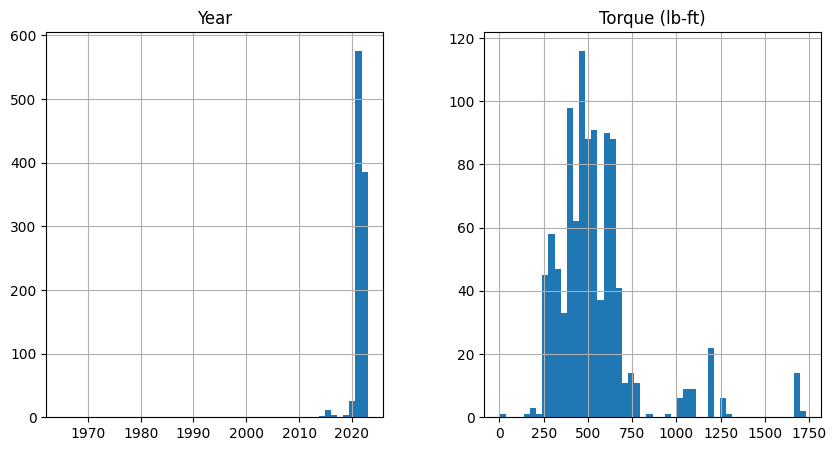

In [18]:
%matplotlib inline 
car.hist(bins=50, figsize=(10,5))
plt.show()

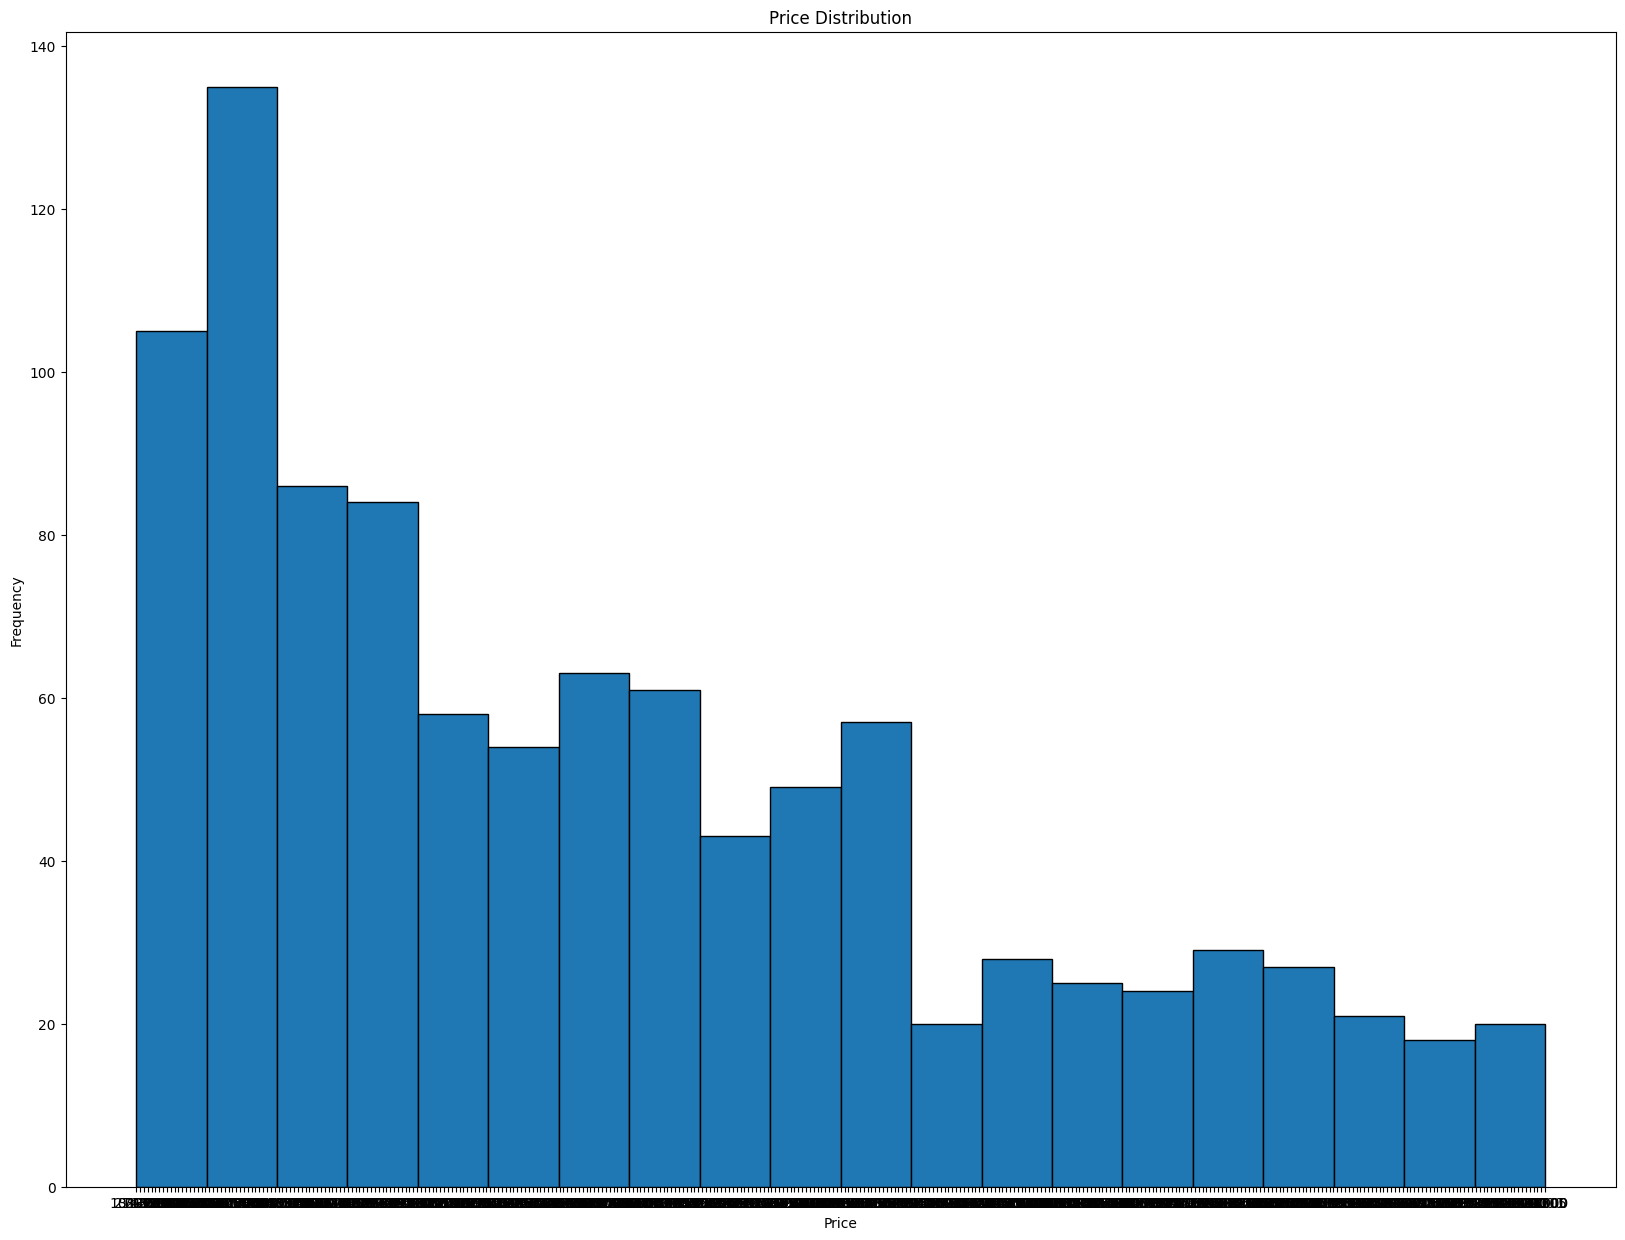

In [19]:
import matplotlib.pyplot as plt

# Histogram of the price column
plt.figure(figsize=(20, 15))
plt.hist(car['Price (in USD)'], bins=20, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


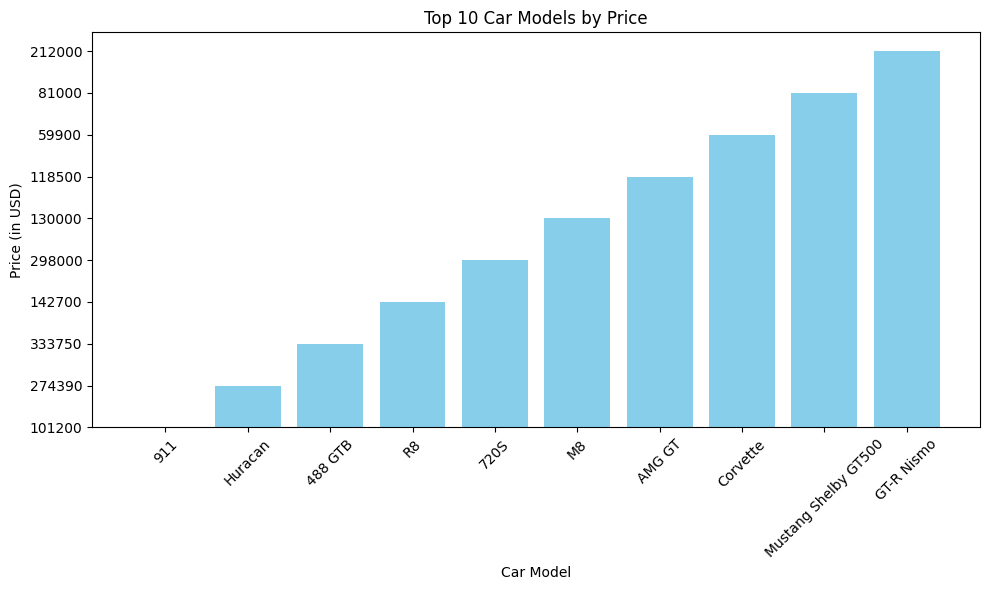

In [20]:
import matplotlib.pyplot as plt

# Assuming 'Car Model' and 'Price (in USD)' are columns in the DataFrame
# Sort the DataFrame by price or another criteria (if needed)
top_10_cars = car[['Car Model', 'Price (in USD)']].head(10)  # Select top 10 cars

# Create a bar plot for the top 10 car models and prices
plt.figure(figsize=(10, 6))
plt.bar(top_10_cars['Car Model'], top_10_cars['Price (in USD)'], color='skyblue')
plt.title('Top 10 Car Models by Price')
plt.xlabel('Car Model')
plt.ylabel('Price (in USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


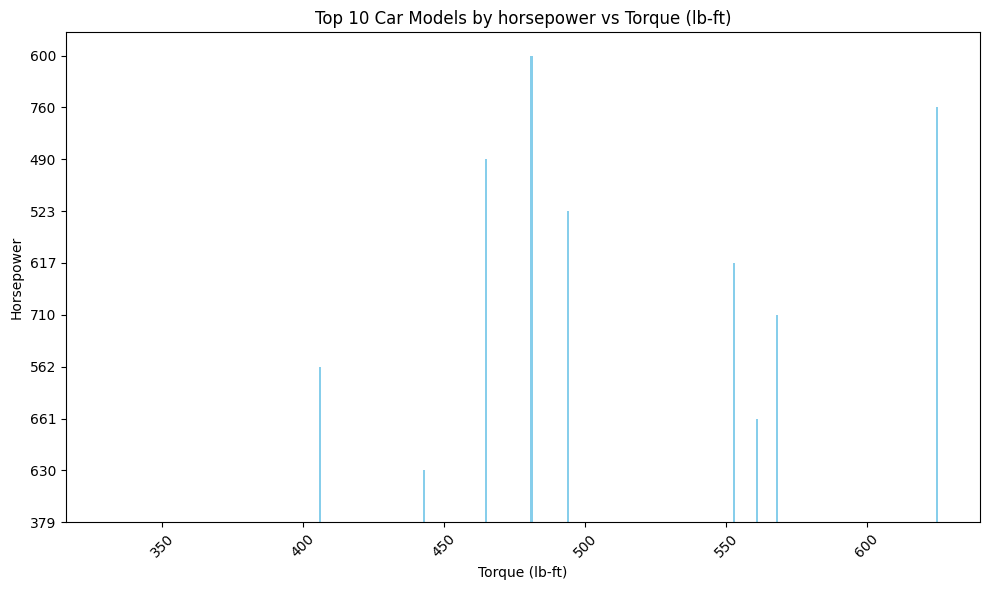

In [21]:
import matplotlib.pyplot as plt

# Assuming 'Car Model' and 'Price (in USD)' are columns in the DataFrame
# Sort the DataFrame by price or another criteria (if needed)
top_10_cars = car[['Torque (lb-ft)', 'Horsepower']].head(10)  # Select top 10 cars

# Create a bar plot for the top 10 car models and prices
plt.figure(figsize=(10, 6))
plt.bar(top_10_cars['Torque (lb-ft)'], top_10_cars['Horsepower'], color='skyblue')
plt.title('Top 10 Car Models by horsepower vs Torque (lb-ft)')
plt.xlabel('Torque (lb-ft)')
plt.ylabel('Horsepower')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [22]:
car["Year"].unique()

array([2022, 2021, 2015, 2020, 2019, 2017, 1965, 2014, 2023])

In [35]:
Engine_Size_map = {"Gas":0, "Electric":1}
Year = {2019:0, 2020:1, 2021:2, 2022:3, 2023:4}

car["Engine Size (L)"] = car["Engine Size (L)"].map(Engine_Size_map)
car["Year"] = car.Year.map(Year)

In [41]:
print(car.columns)

Index(['Car Model', 'Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)',
       '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')
